In [12]:
%pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 1.2 MB/s eta 0:00:0000:0100:01m
  Using cached smart_open-7.0.5-py3-none-any.whl (61 kB)

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [14]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [15]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

word = "king"
similar_words = model.most_similar(word)
print(f"Most similar words to '{word}': {similar_words}")


Most similar words to 'king': [('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


The results do make sense. Most of the words have what I would call a direct correlation or association. Words like brother and son I could see the connection as well depending on context.

In [16]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [17]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [18]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

words_to_test = ["teacher", "nurse", "scientist"]
for word in words_to_test:
    biased_result = model.most_similar(positive=[word, gender])
    print(f"Most similar words to '{word}' after adding gender bias: {biased_result}")

Most similar words to 'teacher' after adding gender bias: [('menstruating', 0.5735808610916138), ('pregnant', 0.5381876230239868), ('childbirth', 0.5263790488243103), ('woman', 0.5160545110702515), ('lactating', 0.5082141160964966), ('congresswoman', 0.5025773644447327), ('miscarry', 0.5000830888748169), ('widowed', 0.4922616183757782), ('schoolteacher', 0.4898378252983093), ('miscarried', 0.4867388606071472)]
Most similar words to 'nurse' after adding gender bias: [('menstruating', 0.5939095616340637), ('pregnant', 0.5700502395629883), ('lactating', 0.5530603528022766), ('childbirth', 0.5304849743843079), ('miscarried', 0.5215179920196533), ('miscarry', 0.5200678706169128), ('pregnancy', 0.5093578100204468), ('uterus', 0.5088896155357361), ('woman', 0.5035874247550964), ('congresswoman', 0.49392861127853394)]
Most similar words to 'scientist' after adding gender bias: [('menstruating', 0.5493638515472412), ('congresswoman', 0.5115507245063782), ('adoptee', 0.501831591129303), ('pregna

There does appear to be a significant gender bias in the results based on what the output returned. 

Part 2: Visualization and Embeddings in Space

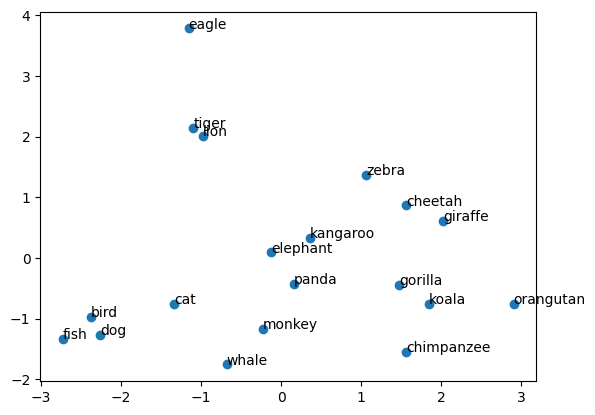

In [19]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

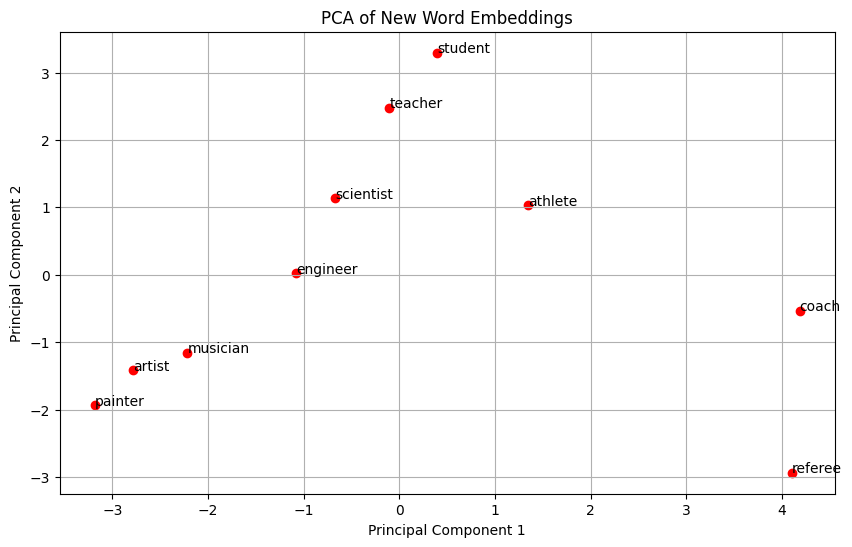

In [20]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.


new_words = ["teacher", "student", "engineer", "scientist", "artist", "painter", "musician", "athlete", "coach", "referee"]
new_word_vectors = [model[word] for word in new_words]
reduced_vectors_new = pca.fit_transform(new_word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_new[:, 0], reduced_vectors_new[:, 1], color='red')
for i, word in enumerate(new_words):
    plt.annotate(word, xy=(reduced_vectors_new[i, 0], reduced_vectors_new[i, 1]))
plt.title('PCA of New Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


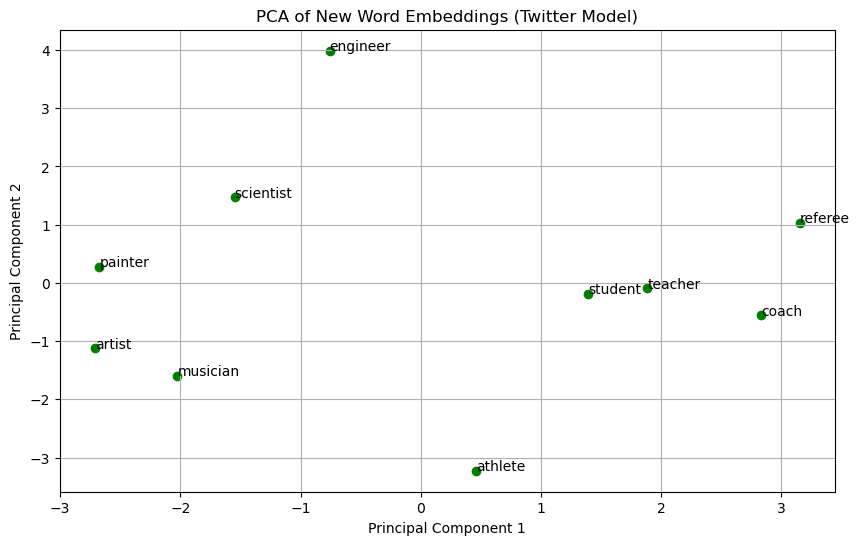

In [10]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
new_word_vectors_twitter = [twitter_model[word] for word in new_words]
reduced_vectors_new_twitter = pca.fit_transform(new_word_vectors_twitter)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_new_twitter[:, 0], reduced_vectors_new_twitter[:, 1], color='green')
for i, word in enumerate(new_words):
    plt.annotate(word, xy=(reduced_vectors_new_twitter[i, 0], reduced_vectors_new_twitter[i, 1]))
plt.title('PCA of New Word Embeddings (Twitter Model)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Part 3: Embedding reddit posts

In [ ]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

data.head(100)



,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1


In [23]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['clean_text'] = data['text'].apply(clean)

#creating bag of words representation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['clean_text'])

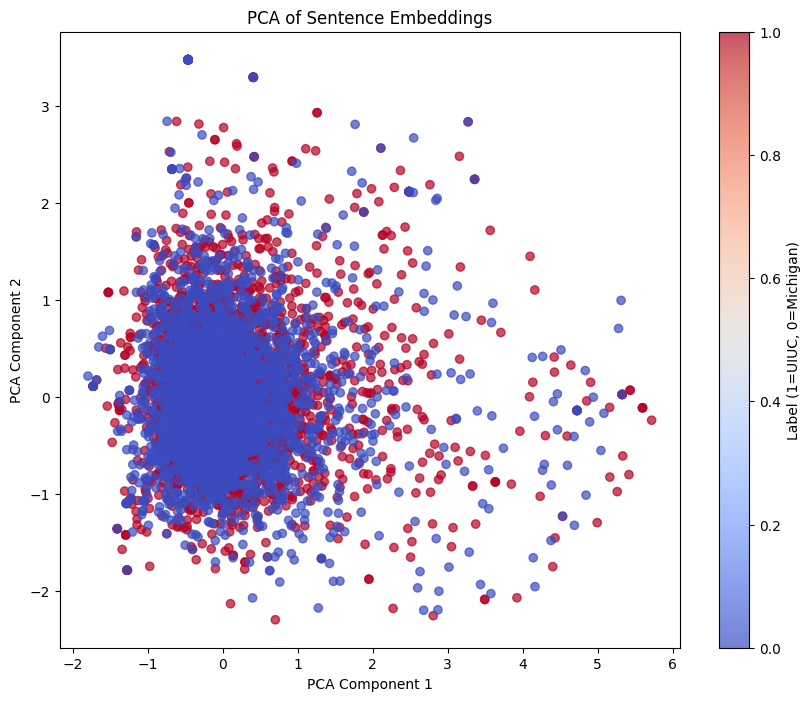

In [24]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

import numpy as np

data = data[data['text'].notnull()]
data = data[data['text'].apply(lambda x: isinstance(x, str))]

# Function to compute the average embedding for a sentence
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.nan  # Return NaN if no words in the sentence are in the model

# Calculate average embeddings for the 'text' column
data['embedding'] = data['text'].apply(lambda x: avg_embedding(x, model))

# Remove rows with NaN embeddings
data = data.dropna(subset=['embedding'])

# Convert embeddings to a NumPy array for PCA
embeddings = np.stack(data['embedding'].values)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

# Plot PCA scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Label (1=UIUC, 0=Michigan)")



plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Sentence Embeddings")
plt.show()




There does not appear to be a clear distinction between the two of them. They are heavily overlayed in the data points.

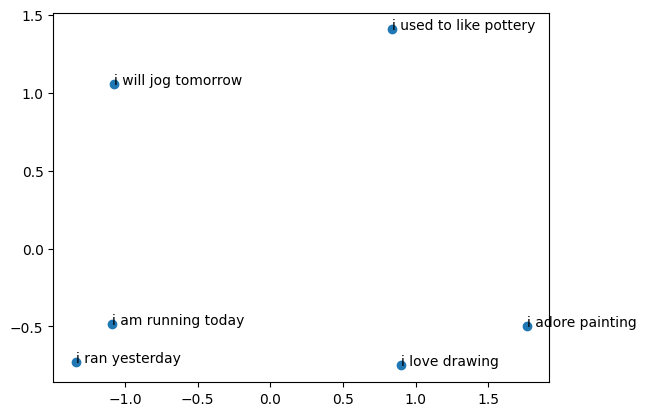

In [25]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


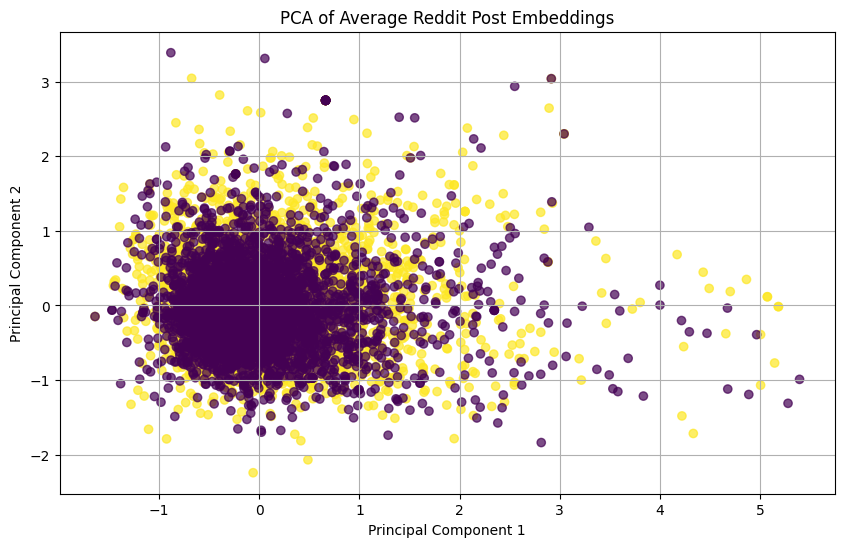

In [26]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 


data['avg_embedding'] = data['clean_text'].apply(lambda x: avg_embedding(x, model))

#remove nan values
data = data[data['avg_embedding'].apply(lambda x: x is not None and not np.isnan(x).any())]

#convert list of embeddings to numpy array
avg_embeddings_data = np.array(data['avg_embedding'].tolist())

#plot the pca of the average embeddings, color by the "label" column
pca_avg = PCA(n_components=2)
reduced_avg_embeddings = pca_avg.fit_transform(avg_embeddings_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_avg_embeddings[:, 0], reduced_avg_embeddings[:, 1], c=data['label'], cmap='viridis', alpha=0.7)
plt.title('PCA of Average Reddit Post Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

The data points in this are slightly spread out more here, but still there is heavy overlay in the data points.

Part 4: HuggingFace and BERT

In [27]:
%pip install 'transformers[torch]'

  Using cached transformers-4.46.2-py3-none-any.whl (10.0 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.7/287.7 kB 6.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.3/392.3 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 8.7 MB/s eta 0:00:0000:0100:01
  Using cached accelerate-1.1.1-py3-none-any.whl (333 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.

In [28]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [29]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
# Remove rows with None values in sentiment
data["text"] = data["text"].apply(lambda x: x[:300] if isinstance(x, str) else "")

# Apply sentiment analysis and store results in `sentiments`
sentiments = []
for d in data["text"]:
    if d:  # Check if the text is non-empty
        try:
            sentiments.append(pipe(d))
        except Exception as e:
            sentiments.append([{"label": "UNK", "score": 0.0}])  # Fallback to 'UNK' in case of an error
    else:
        sentiments.append([{"label": "UNK", "score": 0.0}])  # Handle empty strings

# Extract labels from sentiments
sentiments = [sentiment[0]["label"] for sentiment in sentiments]
data["Sentiment"] = sentiments
data

Error processing text: See my other comment: [https://www.reddit.com/r/UIUC/comments/1f2irsh/comment/lk6l1jl/?utm\_source=share&utm\_medium=web3x&utm\_name=web3xcss&utm\_term=1&utm\_content=share\_button](https://www.reddit.com/r/UIUC/comments/1f2irsh/comment/lk6l1jl/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&ut
Error: index out of range in self
Error processing text: I have always heard it is best to have an appointment time ([(877) 819-2593](https://www.google.com/search?sca_esv=861bfe30a48f43f8&q=%22champaign%22+illinois+social+security+office+walk+in&sa=X&ved=2ahUKEwiD7prZ3pKIAxVYhYkEHQdZBoMQ5t4CegQIFBAB&biw=1590&bih=864&dpr=3#)) to avoid a long wait.  They d
Error: index out of range in self
Error processing text: on the contrary, there are [alternative documents](https://urldefense.proofpoint.com/v2/url?u=http-3A__www.uscis.gov_i-2D9-2Dcentral_acceptable-2Ddocuments&d=DwMFAg&c=OCIEmEwdEq_aNlsP4fF3gFqSN-E3mlr2t9JcDdfOZag&r=mUQV-P5bn5rGPlAHcspO8F_Ci9oOqIodrl3oTPdF8eo&m=9V

,Unnamed: 0,date,post_votes,text,user,com_votes,label,clean_text,embedding,avg_embedding,sentiment,Sentiment
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,"[-0.05942659, 0.21656176, 0.21716243, -0.20700...","[-0.030461071, 0.21456888, 0.13248311, -0.1968...",None,NEU
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,"[-0.2372216, 0.27575913, 0.49731037, -0.247608...","[-0.21829768, 0.2688473, 0.47934544, -0.243480...","[{'label': 'NEG', 'score': 0.9561864137649536}]",NEG
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,"[-0.071084, -0.024767201, -0.007165992, -0.085...","[0.11433978, 0.15580824, -0.07556946, -0.08613...","[{'label': 'NEU', 'score': 0.9749770760536194}]",NEU
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,"[-0.1463147, 0.08196863, 0.41991884, -0.159251...","[-0.105588354, 0.1307663, 0.34289408, -0.13029...",None,NEU
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,"[-0.0591195, 0.1168085, 0.365885, -0.20821063,...","[-0.038463134, 0.1111263, 0.46662, -0.24359497...",None,POS
...,...,...,...,...,...,...,...,...,...,...,...,...
1830,1830,2024-08-27 22:29:41,77,The weather was fluctuating like crazy yesterd...,Mother-Cap4034,1,0,the weather was fluctuating like crazy yesterd...,"[-0.06372771, 0.02328792, 0.36931157, -0.16903...","[-0.13980405, -0.003254811, 0.38680103, -0.178...",NaN,NEU
485,485,2024-09-02 01:28:43,31,I’m dying out here and it’s week 1,xRPx7,2,0,im dying out here and its week,"[-0.13306718, 0.3840495, 0.3215638, -0.2295429...","[0.020969566, 0.17701674, 0.38636112, -0.26842...",None,NEG
2063,2063,2024-08-27 00:37:05,50,In my experience they’re usually on the busy s...,riveter1481,133,0,in my experience theyre usually on the busy si...,"[-0.23127246, 0.057246394, 0.36061698, -0.2067...","[-0.18897618, 0.055544447, 0.34326223, -0.1784...",NaN,NEU
1874,1874,2024-08-27 18:26:52,112,There's a publicly accessible free shower in E...,ShootTrump24,1,0,theres a publicly accessible free shower in ee...,"[-0.075282454, 0.12951984, 0.18449564, -0.1128...","[0.026475813, 0.21956988, 0.12872888, -0.03530...",NaN,NEU


In [53]:
#report the most common sentiment
data["Sentiment"].value_counts().idxmax()

'NEU'

In [54]:
#look at ten sample posts and labels; do you agree with all of them? 
data.sample(10)



,Unnamed: 0,date,post_votes,text,user,com_votes,label,clean_text,embedding,avg_embedding,sentiment,Sentiment
6930,6930,2024-07-13 18:10:27,18,Probably a sample from a vendor.,badmouthrising,8,0,probably a sample from a vendor,"[-0.13624999, 0.2494005, 0.21492, -0.22963351,...","[-0.027589997, 0.313102, 0.17761667, -0.212891...",NaN,NEU
2572,2572,2024-08-25 19:33:34,26,"it has always been like this for years, you’ll...",kidscore,1,0,it has always been like this for years youll l...,"[-0.08742158, 0.38094673, 0.4098903, -0.20952,...","[-0.07823756, 0.3838043, 0.35470605, -0.239300...",NaN,NEU
8071,8071,2024-07-06 22:00:27,86,Really interesting! My daughter will be a fres...,nonnymauss,31,0,really interesting my daughter will be a fresh...,"[-0.03683572, 0.19393946, 0.39372844, -0.53242...","[0.09260704, 0.20077519, 0.33061543, -0.475197...",NaN,POS
3661,3661,2024-08-17 05:47:52,40,The type of intellectual discussion we need on...,tylerfioritto,12,0,the type of intellectual discussion we need on...,"[-0.04404625, 0.27451, 0.21242471, 0.06624003,...","[-0.043396, 0.2168011, 0.26972422, 0.014478922...",NaN,POS
7020,7020,2024-07-13 04:17:54,0,Do you think I should call em or email them.,Youssef1781,2,0,do you think i should call em or email them,"[-0.26459303, 0.3711407, 0.41318431, -0.487002...","[-0.21704702, 0.37307552, 0.39101002, -0.54374...",NaN,NEU
5140,5140,2024-08-01 20:06:52,168,"Like Commuter North/South already do, and like...",carter1137,6,0,like commuter northsouth already do and like n...,"[-0.18136546, 0.3911849, 0.28890622, -0.451222...","[-0.11164932, 0.38719562, 0.28667626, -0.39703...",NaN,NEU
3192,3192,2024-08-21 18:39:45,4,Traders at Michigan is for Quant and SWE!,Richbanana2,1,0,traders at michigan is for quant and swe,"[-0.14550075, 0.26635525, 0.36050275, -0.14122...","[-0.09944824, 0.20365137, 0.11190863, -0.15944...",NaN,NEU
2762,2762,2024-08-27 00:21:28,289,"I read this and thought ""no way"" so I googled ...",Party_Elephant8884,15,1,i read this and thought no way so i googled it...,"[-0.14609657, 0.28216764, 0.30529687, -0.27800...","[-0.11442266, 0.32072327, 0.34717444, -0.30693...",NaN,NEU
3105,3105,2024-08-26 00:22:03,0,ooh thanks for the link!!,evanwuaiwen,1,1,ooh thanks for the link,"[0.011218995, 0.1575275, 0.37882978, -0.268816...","[0.027134795, 0.13571241, 0.31238043, -0.17277...",NaN,POS
122,122,2024-09-03 22:09:07,0,"Have you already taken ece 313? If not, you ca...",ag1492,1,1,have you already taken ece if not you cant do...,"[-0.13250846, 0.26319396, 0.3804203, -0.280236...","[-0.16393733, 0.32717797, 0.37186775, -0.39990...","[{'label': 'NEG', 'score': 0.5668428540229797}]",NEG
